In [69]:
# Import Python Libraries
import pandas as pd
import numpy as np
import datetime 
# plotting
from matplotlib import pyplot as plt
import seaborn as sns

In [138]:
# Import Python Libraries
import pandas as pd
import numpy as np
import datetime 
# plotting
from matplotlib import pyplot as plt
import seaborn as sns
#For modelling
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
#Lassocv
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn import linear_model
print(__doc__)
from sklearn.model_selection import train_test_split, cross_val_score

Automatically created module for IPython interactive environment


In [71]:
#Reading the excel file into dataframe
df=pd.read_excel("City Hotel_Final Analysis.xlsx")

In [72]:
df.head()

,hotel,is_Canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_year_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,1,2015,September,2015-September,36,1,0,1,...,No Deposit,9.0,NaN,0,Contract,95.00,0,1,Check-Out,2015-09-02
1,City Hotel,0,8,2015,September,2015-September,36,1,0,2,...,No Deposit,7.0,NaN,0,Transient,73.15,0,0,Check-Out,2015-09-03
2,City Hotel,0,0,2015,September,2015-September,36,1,0,1,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-09-02
3,City Hotel,0,1,2015,September,2015-September,36,1,0,1,...,No Deposit,NaN,45.0,0,Transient,0.00,0,1,Check-Out,2015-09-02
4,City Hotel,0,1,2015,September,2015-September,36,1,0,1,...,No Deposit,NaN,45.0,0,Transient,0.00,0,1,Check-Out,2015-09-02


In [73]:
# create an Empty DataFrame object to create dummy objects
df_dummy = pd.DataFrame() 

In [74]:
def arrival_date_qtr_dummy(df) :
    if (df["arrival_date_month"] in ["January" ,"February", "March"]) :
        return 1
    elif (df["arrival_date_month"] in ["April" ,"May", "June"]) :
        return 2
    elif (df["arrival_date_month"] in ["July" ,"August", "September"]) :
        return 3
    return 4
df_dummy["arrival_date_qtr_dummy"] = df.apply(lambda df:arrival_date_qtr_dummy(df),axis = 1)

In [75]:
#convert month to QTR
#df_dummy['arrival_date_qtr'] = df['arrival_date_year_month'].map(lambda df: pd.Period(df,'Q'))

In [76]:
def stays_in_week_nights_dummy(df) :
    if (df["stays_in_week_nights"]== 2) :
        return 1
    return 0
df_dummy["stays_in_week_nights_dummy"] = df.apply(lambda df:stays_in_week_nights_dummy(df),axis = 1)

In [77]:
def country_dummy(df) :
    if (df["country"]== "PRT") :
        return 1
    return 0
df_dummy["country_dummy"] = df.apply(lambda df:country_dummy(df),axis = 1)

In [78]:
def reserved_room_type_dummy(df) :
    if (df["reserved_room_type"]== "A") :
        return 1
    return 0
df_dummy["reserved_room_type_dummy"] = df.apply(lambda df:reserved_room_type_dummy(df),axis = 1)

In [79]:
def assigned_room_type_dummy(df) :
    if (df["assigned_room_type"]== "A") :
        return 1
    return 0
df_dummy["assigned_room_type_dummy"] = df.apply(lambda df:assigned_room_type_dummy(df),axis = 1)

In [80]:
def agent_dummy(df) :
    if (df["agent"]== "240") :
        return 1
    return 0
df_dummy["agent_dummy"] = df.apply(lambda df:agent_dummy(df),axis = 1)

In [81]:
def customer_type_dummy(df) :
    if (df["customer_type"]== "Transient") :
        return 1
    return 0
df_dummy["customer_type_dummy"] = df.apply(lambda df:customer_type_dummy(df),axis = 1)

In [82]:
def distribution_channel_dummy(df) :
    if (df["distribution_channel"]== "TA/TO") :
        return 1
    return 0
df_dummy["distribution_channel_dummy"] = df.apply(lambda df:distribution_channel_dummy(df),axis = 1)

In [83]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   arrival_date_qtr_dummy      65535 non-null  int64
 1   stays_in_week_nights_dummy  65535 non-null  int64
 2   country_dummy               65535 non-null  int64
 3   reserved_room_type_dummy    65535 non-null  int64
 4   assigned_room_type_dummy    65535 non-null  int64
 5   agent_dummy                 65535 non-null  int64
 6   customer_type_dummy         65535 non-null  int64
 7   distribution_channel_dummy  65535 non-null  int64
dtypes: int64(8)
memory usage: 4.0 MB


In [84]:
df_dummy.head()

,arrival_date_qtr_dummy,stays_in_week_nights_dummy,country_dummy,reserved_room_type_dummy,assigned_room_type_dummy,agent_dummy,customer_type_dummy,distribution_channel_dummy
0,3,0,0,1,0,0,0,1
1,3,1,1,1,0,0,1,1
2,3,0,1,1,0,0,1,0
3,3,0,1,1,0,0,1,0
4,3,0,1,1,1,0,1,0


In [85]:
final_df = pd.concat([df, df_dummy], axis=1)

In [86]:
final_df.head()

,hotel,is_Canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_year_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reservation_status,reservation_status_date,arrival_date_qtr_dummy,stays_in_week_nights_dummy,country_dummy,reserved_room_type_dummy,assigned_room_type_dummy,agent_dummy,customer_type_dummy,distribution_channel_dummy
0,City Hotel,0,1,2015,September,2015-September,36,1,0,1,...,Check-Out,2015-09-02,3,0,0,1,0,0,0,1
1,City Hotel,0,8,2015,September,2015-September,36,1,0,2,...,Check-Out,2015-09-03,3,1,1,1,0,0,1,1
2,City Hotel,0,0,2015,September,2015-September,36,1,0,1,...,Check-Out,2015-09-02,3,0,1,1,0,0,1,0
3,City Hotel,0,1,2015,September,2015-September,36,1,0,1,...,Check-Out,2015-09-02,3,0,1,1,0,0,1,0
4,City Hotel,0,1,2015,September,2015-September,36,1,0,1,...,Check-Out,2015-09-02,3,0,1,1,1,0,1,0


In [87]:
#drop columns not needed for the regression from the final dataset
final_df=final_df.drop(['hotel',
               'arrival_date_month', 
               'arrival_date_week_number',
               'arrival_date_day_of_month',
               'meal',
               'country',
               'market_segment',
               'distribution_channel',
               'reserved_room_type',
               'assigned_room_type',
               'deposit_type',
               'agent',
               'company',
               'customer_type',
             "arrival_date_year_month", "reservation_status_date", "reservation_status"], axis=1)
#dropped reservation_satatus as it was highly correlated the rest were dropped based on our EDA analysis

In [88]:
final_df.columns

Index(['is_Canceled', 'lead_time', 'arrival_date_year',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_Canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'arrival_date_qtr_dummy',
       'stays_in_week_nights_dummy', 'country_dummy',
       'reserved_room_type_dummy', 'assigned_room_type_dummy', 'agent_dummy',
       'customer_type_dummy', 'distribution_channel_dummy'],
      dtype='object')

In [89]:
final_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_Canceled                     65535 non-null  int64  
 1   lead_time                       65535 non-null  int64  
 2   arrival_date_year               65535 non-null  int64  
 3   stays_in_weekend_nights         65535 non-null  int64  
 4   stays_in_week_nights            65535 non-null  int64  
 5   adults                          65535 non-null  int64  
 6   children                        65535 non-null  int64  
 7   babies                          65535 non-null  int64  
 8   is_repeated_guest               65535 non-null  int64  
 9   previous_cancellations          65535 non-null  int64  
 10  previous_bookings_not_Canceled  65535 non-null  int64  
 11  booking_changes                 65535 non-null  int64  
 12  days_in_waiting_list            

In [90]:
final_df.head()

,is_Canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,required_car_parking_spaces,total_of_special_requests,arrival_date_qtr_dummy,stays_in_week_nights_dummy,country_dummy,reserved_room_type_dummy,assigned_room_type_dummy,agent_dummy,customer_type_dummy,distribution_channel_dummy
0,0,1,2015,0,1,1,0,0,0,0,...,0,1,3,0,0,1,0,0,0,1
1,0,8,2015,0,2,1,0,0,0,0,...,0,0,3,1,1,1,0,0,1,1
2,0,0,2015,0,1,2,0,0,0,0,...,0,0,3,0,1,1,0,0,1,0
3,0,1,2015,0,1,1,0,0,0,0,...,0,1,3,0,1,1,0,0,1,0
4,0,1,2015,0,1,1,0,0,0,0,...,0,1,3,0,1,1,1,0,1,0


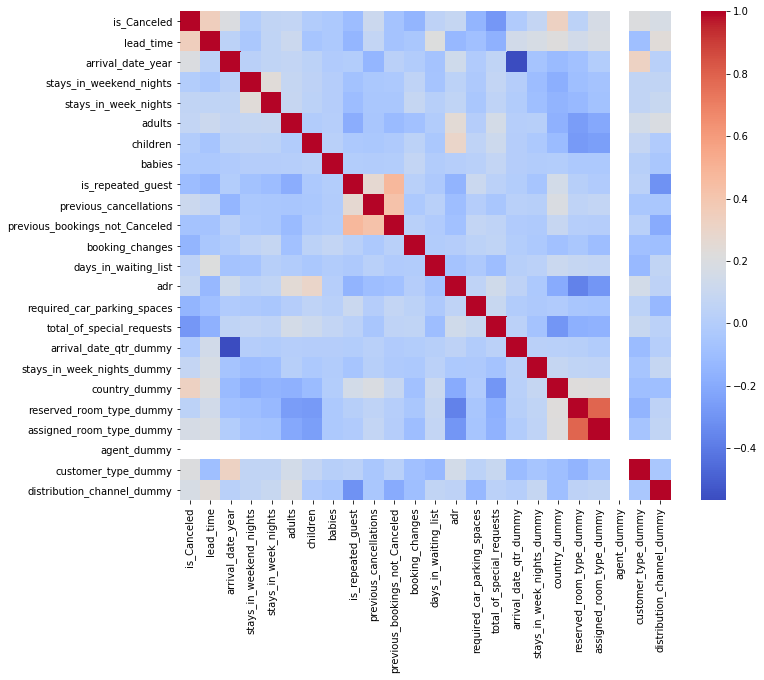

In [91]:
#EDA on fields 
#correlation
correlation = final_df.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(correlation,cmap='coolwarm')

In [93]:
#Check for class imbalance
final_df['is_Canceled'].value_counts()

0    34609
1    30926
Name: is_Canceled, dtype: int64

In [94]:
#Input and output variables
X,y = final_df.drop('is_Canceled',axis=1),final_df['is_Canceled']

In [95]:
#Split the data into 70-30 train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=50)

In [96]:
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((45874, 23), (19661, 23), (45874,), (19661,))

In [97]:
#forward backward selection
# Build logistic rregression to use in feature selection
#Forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lr = LogisticRegression(max_iter=10000)

# Build step forward feature selection
sfs1 = sfs(lr,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=3)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished

[2020-11-23 10:56:18] Features: 1/10 -- score: 0.6669137322281907[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.6s finished

[2020-11-23 10:56:20] Features: 2/10 -- score: 0.7036665199902887[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    5.1s finished

[2020-11-23 10:56:25] Features: 3/10 -- score: 0.7077428736694769[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [117]:
# Features list that were selected
feature_cols = list(sfs1.k_feature_idx_)
print(feature_cols)

[0, 10, 12, 13, 14, 17, 18, 19, 21, 22]


In [99]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_Canceled                     65535 non-null  int64  
 1   lead_time                       65535 non-null  int64  
 2   arrival_date_year               65535 non-null  int64  
 3   stays_in_weekend_nights         65535 non-null  int64  
 4   stays_in_week_nights            65535 non-null  int64  
 5   adults                          65535 non-null  int64  
 6   children                        65535 non-null  int64  
 7   babies                          65535 non-null  int64  
 8   is_repeated_guest               65535 non-null  int64  
 9   previous_cancellations          65535 non-null  int64  
 10  previous_bookings_not_Canceled  65535 non-null  int64  
 11  booking_changes                 65535 non-null  int64  
 12  days_in_waiting_list            

In [100]:
# Build full logistic regression model with selected features using forward selection
#Logistic regressiom
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train.iloc[:, feature_cols], y_train)
y_pred = logreg.predict(X_test.iloc[:, feature_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred))

Testing accuracy on selected features: 0.784


In [101]:
from sklearn.metrics import confusion_matrix
logmatx = confusion_matrix(y_test, y_pred)
print(logmatx)

[[8556 1739]
 [2504 6862]]


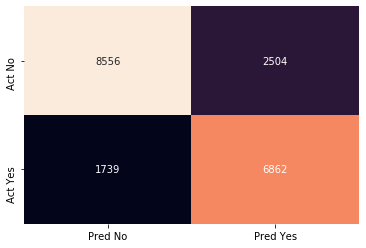

In [102]:
sns.heatmap(logmatx.T, annot=True, fmt='d', cbar=False,
          xticklabels=['Pred No','Pred Yes'],
          yticklabels=['Act No','Act Yes'] )

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80     10295
           1       0.80      0.73      0.76      9366

    accuracy                           0.78     19661
   macro avg       0.79      0.78      0.78     19661
weighted avg       0.79      0.78      0.78     19661



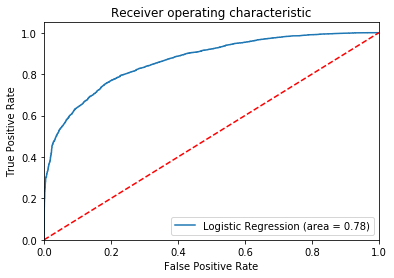

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test.iloc[:, feature_cols]))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test.iloc[:, feature_cols])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [105]:
# Build Random Forest model with selected features using forward selection
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
rf.fit(X_train.iloc[:, feature_cols], y_train)

y_train_pred = rf.predict(X_train.iloc[:, feature_cols])
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = rf.predict(X_test.iloc[:, feature_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Training accuracy on selected features: 0.796
Testing accuracy on selected features: 0.794


In [106]:
# Build Decision Tree model with selected features using forward selection
#Decision tree
from sklearn.tree import DecisionTreeClassifier
desctree = DecisionTreeClassifier()
desctree.fit(X_train.iloc[:, feature_cols], y_train)
y_pred_desct = desctree.predict(X_test.iloc[:, feature_cols])

In [107]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_desct))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_desct))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_desct)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_desct))

Mean Absolute Error: 0.170
Mean Squared Error: 0.170
Root Mean Squared Error: 0.413
Testing accuracy on selected features: 0.830


In [108]:
# Build XGBoost Classifier model with selected features using forward selection
#Xgbclassifier
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = xgb.XGBClassifier(objective='reg:logistic')
xgbc.fit(X_train.iloc[:, feature_cols],y_train)
y_pred_xgbc = xgbc.predict(X_test.iloc[:, feature_cols])

In [109]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_xgbc))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_xgbc))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbc)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_xgbc))

Mean Absolute Error: 0.148
Mean Squared Error: 0.148
Root Mean Squared Error: 0.384
Testing accuracy on selected features: 0.852


In [110]:
# Build Naive Bayes model with selected features using forward selection
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.iloc[:, feature_cols],y_train)
y_pred_gnb = gnb.predict(X_test.iloc[:, feature_cols])

In [111]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.iloc[:, feature_cols].shape[0], (y_test != y_pred_gnb).sum()))

Number of mislabeled points out of a total 19661 points : 8312


In [112]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 57.72341183052744


In [113]:
#backward selection
# Build logistic rregression to use in feature selection
#backward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lr_back = LogisticRegression(max_iter=10000)

# Build step forward feature selection
sfs2 = sfs(lr_back,
           k_features=20,
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=3)

# Perform SFFS
sfs2 = sfs2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  5.4min finished

[2020-11-23 11:07:10] Features: 22/20 -- score: 0.794436849752235[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  4.3min finished

[2020-11-23 11:11:26] Features: 21/20 -- score: 0.7952216265358261[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  3.7min finished

[2020-11-23 11:15:07] Features: 20/20 -- score: 0.7947202622368131

In [116]:
# Features list that were selected
feature_cols_back = list(sfs2.k_feature_idx_)
print(feature_cols_back)

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22]


In [118]:
# Build full logistic regression model with selected features using forward selection
#Logistic regressiom
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train.iloc[:, feature_cols_back], y_train)
y_pred = logreg.predict(X_test.iloc[:, feature_cols_back])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred))

Testing accuracy on selected features: 0.792


In [119]:
from sklearn.metrics import confusion_matrix
logmatx = confusion_matrix(y_test, y_pred)
print(logmatx)

[[8691 1604]
 [2481 6885]]


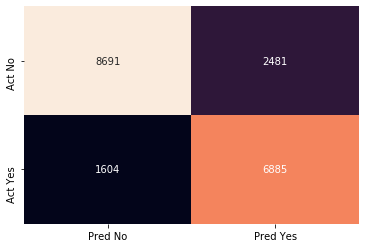

In [120]:
sns.heatmap(logmatx.T, annot=True, fmt='d', cbar=False,
          xticklabels=['Pred No','Pred Yes'],
          yticklabels=['Act No','Act Yes'] )

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     10295
           1       0.81      0.74      0.77      9366

    accuracy                           0.79     19661
   macro avg       0.79      0.79      0.79     19661
weighted avg       0.79      0.79      0.79     19661



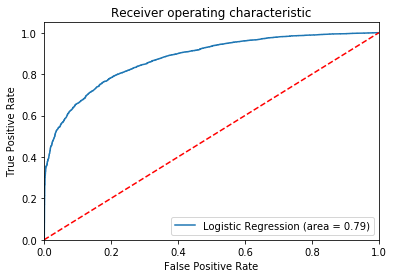

In [123]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test.iloc[:, feature_cols_back]))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test.iloc[:, feature_cols_back])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [125]:
# Build Random Forest model with selected features using backward selection
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
rf.fit(X_train.iloc[:, feature_cols_back], y_train)

y_train_pred = rf.predict(X_train.iloc[:, feature_cols_back])
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = rf.predict(X_test.iloc[:, feature_cols_back])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Training accuracy on selected features: 0.829
Testing accuracy on selected features: 0.828


In [126]:
# Build Decision Tree model with selected features using backward selection
#Decision tree
from sklearn.tree import DecisionTreeClassifier
desctree = DecisionTreeClassifier()
desctree.fit(X_train.iloc[:, feature_cols_back], y_train)
y_pred_desct = desctree.predict(X_test.iloc[:, feature_cols_back])

In [127]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_desct))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_desct))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_desct)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_desct))

Mean Absolute Error: 0.147
Mean Squared Error: 0.147
Root Mean Squared Error: 0.383
Testing accuracy on selected features: 0.853


In [128]:
# Build XGBoost Classifier model with selected features using backward selection
#Xgbclassifier
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = xgb.XGBClassifier(objective='reg:logistic')
xgbc.fit(X_train.iloc[:, feature_cols_back],y_train)
y_pred_xgbc = xgbc.predict(X_test.iloc[:, feature_cols_back])

In [129]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_xgbc))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_xgbc))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbc)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_xgbc))

Mean Absolute Error: 0.118
Mean Squared Error: 0.118
Root Mean Squared Error: 0.344
Testing accuracy on selected features: 0.882


In [130]:
# Build Naive Bayes model with selected features using backward selection
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.iloc[:, feature_cols_back],y_train)
y_pred_gnb = gnb.predict(X_test.iloc[:, feature_cols_back])

In [131]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.iloc[:, feature_cols_back].shape[0], (y_test != y_pred_gnb).sum()))

Number of mislabeled points out of a total 19661 points : 8832


In [132]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 55.07858196429479


In [134]:
final_df

,is_Canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,required_car_parking_spaces,total_of_special_requests,arrival_date_qtr_dummy,stays_in_week_nights_dummy,country_dummy,reserved_room_type_dummy,assigned_room_type_dummy,agent_dummy,customer_type_dummy,distribution_channel_dummy
0,0,1,2015,0,1,1,0,0,0,0,...,0,1,3,0,0,1,0,0,0,1
1,0,8,2015,0,2,1,0,0,0,0,...,0,0,3,1,1,1,0,0,1,1
2,0,0,2015,0,1,2,0,0,0,0,...,0,0,3,0,1,1,0,0,1,0
3,0,1,2015,0,1,1,0,0,0,0,...,0,1,3,0,1,1,0,0,1,0
4,0,1,2015,0,1,1,0,0,0,0,...,0,1,3,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,0,186,2017,2,1,2,2,0,0,0,...,0,0,2,0,0,0,0,0,1,1
65531,0,186,2017,2,1,2,2,0,0,0,...,0,1,2,0,0,0,0,0,1,1
65532,0,138,2017,2,6,2,0,0,0,0,...,0,0,2,0,0,1,1,0,1,0
65533,0,12,2017,0,1,1,0,0,0,0,...,0,0,2,0,0,1,1,0,1,1


In [143]:
#Lasso-Feature selection
names=final_df.columns.tolist()
names.remove('is_Canceled')

In [144]:
# Create a function called lasso,
def lasso(alphas):
    # Create an empty data frame
    dfs = pd.DataFrame()
    
    # Create a column of feature names
    dfs['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        #lasso = Lasso(alpha=alpha)---this is using OLS model
        lasso = linear_model.Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X,y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        dfs[column_name] = lasso.coef_
        
    # Return the datafram    
    return dfs

In [145]:
# Run the function called, Lasso
out=lasso([.001, .005, 0.01])

In [146]:
out_lasso= out[out['Alpha = 0.010000']!= 0]

In [147]:
df1=out_lasso['Feature Name']

In [148]:
# Selecting only the features identified by Lasso 
df1

0                          lead_time
1                  arrival_date_year
2            stays_in_weekend_nights
3               stays_in_week_nights
8             previous_cancellations
9     previous_bookings_not_Canceled
10                   booking_changes
11              days_in_waiting_list
12                               adr
14         total_of_special_requests
15            arrival_date_qtr_dummy
17                     country_dummy
19          assigned_room_type_dummy
21               customer_type_dummy
22        distribution_channel_dummy
Name: Feature Name, dtype: object

In [149]:
X_train_lasso= X_train.filter(['lead_time','arrival_date_year','stays_in_weekend_nights','stays_in_week_nights','previous_cancellations','previous_bookings_not_Canceled','booking_changes','days_in_waiting_list','adr','total_of_special_requests','arrival_date_qtr_dummy','country_dummy','assigned_room_type_dummy','customer_type_dummy','distribution_channel_dummy'])

In [150]:
X_test_lasso= X_test.filter(['lead_time','arrival_date_year','stays_in_weekend_nights','stays_in_week_nights','previous_cancellations','previous_bookings_not_Canceled','booking_changes','days_in_waiting_list','adr','total_of_special_requests','arrival_date_qtr_dummy','country_dummy','assigned_room_type_dummy','customer_type_dummy','distribution_channel_dummy'])

In [151]:
# Build full logistic regression model with selected features using Lasso selection
#Logistic regressiom
logreg_2 = LogisticRegression(max_iter=10000)
logreg_2.fit(X_train_lasso, y_train)
y_pred_2 = logreg_2.predict(X_test_lasso)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_2))

Testing accuracy on selected features: 0.781


In [152]:
# Build Random Forest model with selected features using backward selection
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
rf.fit(X_train_lasso, y_train)

y_train_pred = rf.predict(X_train_lasso)
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = rf.predict(X_test_lasso)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Training accuracy on selected features: 0.826
Testing accuracy on selected features: 0.825


In [154]:
# Build Decision Tree model with selected features using backward selection
#Decision tree
from sklearn.tree import DecisionTreeClassifier
desctree = DecisionTreeClassifier()
desctree.fit(X_train_lasso, y_train)
y_pred_desct = desctree.predict(X_test_lasso)

In [155]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_desct))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_desct))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_desct)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_desct))

Mean Absolute Error: 0.151
Mean Squared Error: 0.151
Root Mean Squared Error: 0.389
Testing accuracy on selected features: 0.849


In [156]:
# Build XGBoost Classifier model with selected features using backward selection
#Xgbclassifier
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = xgb.XGBClassifier(objective='reg:logistic')
xgbc.fit(X_train_lasso,y_train)
y_pred_xgbc = xgbc.predict(X_test_lasso)

In [158]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_xgbc))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_xgbc))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbc)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_xgbc))

Mean Absolute Error: 0.124
Mean Squared Error: 0.124
Root Mean Squared Error: 0.352
Testing accuracy on selected features: 0.876


In [159]:
# Build Naive Bayes model with selected features using Lasso selection
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_lasso,y_train)
y_pred_gnb = gnb.predict(X_test_lasso)

In [161]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test_lasso.shape[0], (y_test != y_pred_gnb).sum()))

Number of mislabeled points out of a total 19661 points : 5812


In [162]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 70.438940033569
